## Word Vectors

This assignment is comprised of two parts:

1. **Theory**: Solve two exercises about logistic regression and softmax regression. Prove that using sums of word vectors as phrase embeddings is problematic.
2. **Implementation**: You will  experiment with sparse and dense vector representations of words.


Word Vectors are often used as a fundamental component for downstream NLP tasks, e.g. question answering, text generation, translation, etc., so it is important to build some intuitions as to their strengths and weaknesses. Here, you will explore two types of word vectors:

- those derived from *co-occurrence matrices*, and 

- those derived via *word2vec*. 

**Note on Terminology:** The terms "word vectors" and "word embeddings" are often used interchangeably. The term "embedding" refers to the fact that we are encoding aspects of a word's meaning in a lower dimensional space. As [Wikipedia](https://en.wikipedia.org/wiki/Word_embedding) states, "*conceptually it involves a mathematical embedding from a space with one dimension per word to a continuous vector space with a much lower dimension*".

Before getting started with the implementation, install the gensim library:

```sh
conda install gensim
```

To be able to download the large word2vec embeddings file, you may need to run Jupyter Notebook with the following command line option:
  `jupyter notebook --NotebookApp.iopub_msg_rate_limit=1.0e10`

## Name: Naimisha Churi

# <font color="blue"> Submission Instructions</font>

1. Click the Save button at the top of the Jupyter Notebook.
2. Please make sure to have entered your name above.
3. Select Cell -> All Output -> Clear. This will clear all the outputs from all cells (but will keep the content of ll cells). 
4. Select Cell -> Run All. This will run all the cells in order, and will take several minutes.
5. Once you've rerun everything, select File -> Download as -> PDF via LaTeX and download a .pdf version showing the code and the output of all cells, and save it in the same folder that contains the notebook file .ipynb.
6. Look at the PDF file and make sure all your solutions are there, displayed correctly. The PDF is the only thing we will see when grading!
7. Submit **both** your PDF and notebook on Canvas.
8. Verify your Canvas submission contains the correct files by downloading them after posting them on Canvas.

# Theory

## Theory (4111 & 5111): Properties of cosine similarity

1. Prove that doubling the length of a vector $\mathbf{u}$ does not change its cosine similarity with any other vector $\mathbf{v}$, i.e. prove that $cos(2\mathbf{u}, \mathbf{v}) = cos(\mathbf{u}, \mathbf{v})$.
2. Could the cosine similarity be negative when using $tf.idf$ vector representations? Explain your answer.
3. Could the cosine similarity be negative when using prediction-based, dense vector representations? Explain your answer.

YOUR ANSWERS go here ...<br>

<ol>
    <li>
    Let $\text{u}=〈{u}_{1},{u}_{2}...{u}_{n}〉 and \text{v}=〈{v}_{1},{v}_{2}...{v}_{n}〉$. Then,<br><br>
    the vector $2\text{u} = 〈2{u}_{1},{2u}_{2}...2{u}_{n}〉$ <br><br>
    $cos(2\mathbf{u},\mathbf{v}) = \frac{2\mathbf{u}.\mathbf{v}}{\mathbf{||2u||}.\mathbf{||v||}}$<br><br>
    $cos(2\mathbf{u},\mathbf{v}) = \frac{2({u}_{1}{v}_{1},{u}_{2}{v}_{2}...{u}_{n}{v}_{n})}{2.\mathbf{||u||}.\mathbf{||v||}}$<br><br>
    $cos(2\mathbf{u},\mathbf{v}) = \frac{\mathbf{u}.\mathbf{v}}{\mathbf{||u||}.\mathbf{||v||}}$<br><br>
    $cos(2\mathbf{u},\mathbf{v}) = cos(\mathbf{u},\mathbf{v})$<br><br><br>
    </li>
    <li>
    The way a $tf.idf$ vector is generated, it cannot take up a negative value. Both term frequency and inverse document frequency are positive numbers. Since $tf.idf$ equals term frequency multiplied by inverse document frequency, the product cannot be less than 0. This means that the angle between the vectors will fall in the range of 0 to 90 degrees. Since the cosine value ranges from 1 to 0 for an angle in that range, the cosine similarity cannot be negative when using $tf.idf$ vector representations
    </li>
    <li>
    Values in a dense vector can be negative. This may lead to a negative dot product of the vectors of which we need to calculate the cosine similarity. As the denominator of the cosine similarity is a product of two euclidian distances which cannot be negative, the cosine similarity can take up a negative value when calculated using the dense vector representations
    </li>

## Theory (5111): On the fitting power of Logistic Regression


Consider a training set that contains the 4 training examples shown in the table below. Each training example $\mathbf{x}$ has 2 features $x_1$ and $x_2$ and a label $y \in \{0, 1\}$.
$$\begin{aligned}
\begin{array}{cccc}
\mathbf{x} & x_1 & x_2 & y \\
\hline
\mathbf{x}^{(1)} & 0 & 0 & 0 \\
\mathbf{x}^{(2)} & 0 & 1 & 1 \\
\mathbf{x}^{(3)} & 1 & 0 & 1 \\
\mathbf{x}^{(4)} & 1 & 1 & 0 \\
\end{array}
\end{aligned}$$
Prove that no binary logistic regression model can perfectly classify this dataset. 

*Hint: Prove that there cannot be a vector of parameters $\mathbf{w} = [w_1, w_2]$ and bias $b$ such that $P(t = 1|\mathbf{x}; \mathbf{w}, b) \geq 0.5$ for all examples $\mathbf{x}$ that are positive, and $P(t = 1|\mathbf{x}; \mathbf{w}, b) < 0.5$ for all examples $\mathbf{x}$ that are negative.*

YOUR SOLUTION goes here ...<br>

This is a XOR problem. Since it is not a linear problem it cannot be represented using a set of coefficients which are generated by the linear regression model which is a linear model.
<br>
Proof:<br>
Consider the weights generated by the linear regression model as $\mathbf{w} = [w_1, w_2]$, and threshold be equal to t<br>
To prove: <br>
$ 1.w_1 + 0.w_2 >= t $ <br>
$ 0.w_1 + 1.w_2 >= t $ <br>
$ 0.w_1 + 0.w_2  < t $ <br>
$ 1.w_1 + 1.w_2  < t $ <br>

$ w_1 >= t $ <br>
$ w_2 >= t $ <br>
$ 0 < t $ <br>
$ w_1 + w_2 < t $ which is a contradiction<br>

Therefore, the points are not linearly seperable thus cannot be correctly classified by a linear model like logistic regression.

## Theory (5111): Binary vs. Multiclass Logistic Regression

Show that binary Logistic Regression is a special case of multiclass Logistic (Softmax) Regression. That is to say, if $\mathbf{w}_1$ and $\mathbf{w}_2$ are the parameter vectors of a Softmax Regression model for the case of two classes, then there exists a parameter vector $\mathbf{w}$ for binary Logistic Regression that results in the same classification as the Softmax Regression model.

*Hint: Find $\mathbf{w}$ as a function of $\mathbf{w}_1$ and $\mathbf{w}_2$.*

YOUR SOLUTION goes here ... <br>

The softmax function is given as: <br>
$softmax(z_j) = \frac{e^{(z_j)}}{\sum_{i=1}^n e^{(z_i)}} $ <br>

For binary Logistic Regression: <br>

$softmax(z_1) = \frac{e^{(z_1)}}{\sum_{i=1}^n e^{(z_i)}} $ <br>
$softmax(z_2) = \frac{e^{(z_2)}}{\sum_{i=1}^n e^{(z_i)}} $ <br>


For Binary Logistic regression, substitute n = 2 in the above equations<br>

$softmax(z_1) = \frac{e^{(z_1)}}{\sum_{i=1}^2 e^{(z_i)}} $ <br>
$      = \frac{e^{(z_1)}}{e^{(z_1)} + e^{(z_2)}} $

We also know that, <br>
$z_1 = w_1x + b_1$ <br>
and <br>
$z_2 = w_2x + b_2$ <br>

$softmax(z_1) = \frac{e^{(z_1)}}{e^{(z_1)} + e^{(z_2)}}$ and 
$softmax(z_2) = \frac{e^{(z_2)}}{e^{(z_1)} + e^{(z_2)}}$ <br>


considering $softmax(z_1),$ <br>


$z_1 = w_1x + b_1$ <br>
therefore,<br>
$ softmax(z_1) = \frac{e^{(w_1x + b_1)}}{e^{(w_1x + b_1)}+e^{(w_2x + b_2)}}$ <br>
$ softmax(z_1) = \frac{1}{1+ e^{(w_2-w_1)x + (b_2-b_1)}} $ <br>
let $ w = w_1-w_2 $ and $ b = b_1-b_2$<br>
then, <br>
$ softmax(z_1) = \frac{1}{1+ e^{-(wx + b)}} $ <br>

Which is equal to the value of sigmoid functions for $ z_1$

## Theory (Bonus points): Phrase embeddings

Given a phrase consisting of a sequence of M words, $phrase = [word_1, word_2, ..., word_M]$, and given that we have already trained word embeddings $E(word)$ for all the words $word \in V$ in the vocabulary, a simple way of creating an embedding for the phrase is by summing up the embeddings of its words:
\begin{equation}
  E(phrase) = \sum_{m = 1}^M E(word_m)
\end{equation}
Considering an entire movie review to be a very long phrase, we could then train a binary logistic regression model with parameters $\mathbf{w}$ and $b$ for sentiment classification. In that case, the larger the logit score $z(phrase) = \mathbf{w}^T E(phrase) + b$, the higher the probability the model assigns to the positive sentiment for this $phrase$. Prove that in this approach, irrespective of the model parameters, the inequalities below cannot both hold:
\begin{eqnarray}
  z(good) & > & z(not \; good) \\
  z(bad) & < & z(not \; bad)
\end{eqnarray}

YOUR SOLUTION goes here ...<br>

In the binary logistic regression, the way the parameters w, and b are calculated, the features which contribute most to the postive sentiment of the classification problem are assigned a higher value than the features which contribute to the negative sentiment. Snce the $\mathbf{w}$s for a negative class is always minimised, it will always be lesser than the positive class as thie summation will also lead to a lesser number which will lead to lesser values for a $phrase$ that is classified a s negative than a positive $phrase$<br>
So if we classify the documents as good and not good, we get z(good) > z(not good)<br>
and if we classify the documents as bad and not bad, we get z(bad) > z(not bad)<br>
Therefore, the inequalities stated in the problem statement cannot both hold true

## Theory (Bonus points): Time and memory complexity

1. Describe an **efficient** procedure (pseudocode) for computing the $tf.idf$ vectors for all the words in a vocabulary $V$, given a set of documents $D$ that contain a total of $N$ word occurrences, and a context window of size $C$. Compute its time and memory complexity, as a function of the size of $V$, $D$, $N$, and $C$.
2. What are the time and memory complexity of the skip-gram word2vec model described in class for learning dense word embeddings? Assume the vocabulary is $V$, the corpus is a sequence of words of length $N$, the context window contains $C$ words, and that for every context word we sample $K$ negative words. Assume a gradient descent update is made for each center (target) word, and that the algorithm runs $E$ passes over the entire corpus.

YOUR SOLUTION goes here ...<br>

A) Pseudocode:<br>
1. obtain all the unique tokens V form the set of documents D<br>
2. for every window of size C<br>
3. do for all documents tf_idf = log(D[window] + 1) * log(N/D[window])<br>
Time complexity = O(C*D/N) <br>
<br>

B) For space complexity: <br>

let n be the size of window<br>

V*(N/V(n+1)) -- POSITIVE WORDS <br>
(KV)*(N/V(n+1)) -- NEGATIVE WORDS<br>
Therefore, Space complexity = O(N(K+1)) ... taking n as constant<br>
<br>
For Time complexity: <br>
O(E(N(K+1)/V))

# Implementation

In [1]:
# All required import statements are here.
from collections import defaultdict, Counter
import math
import operator
import gzip

import numpy as np
import random
import scipy as sp
from sklearn.decomposition import TruncatedSVD

import pprint
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

np.random.seed(0)
random.seed(0)

## Part 1: Count-Based Word Vectors

Most word vector models start from the following idea:

*You shall know a word by the company it keeps ([Firth, J. R. 1957:11](https://en.wikipedia.org/wiki/John_Rupert_Firth))*

Many word vector implementations are driven by the idea that similar words, i.e., (near) synonyms, will be used in similar contexts. As a result, similar words will often be spoken or written along with a shared subset of words, i.e., contexts. By examining these contexts, we can try to develop embeddings for our words. With this intuition in mind, many "old school" approaches to constructing word vectors relied on word counts.

This part explores distributional similiarity in a dataset of 10,000 Wikipedia articles (4.4M words), building high-dimensional, sparse representations for words from the distinct contexts they appear in.  These representations allow for analysis of the most similar words to a given query.

In [2]:
window = 4
vocabSize = 10000

### Question 1.1: Load corpus and create document frequency  dictionary

Load the data from the Wikipedia file. Each line contains a Wikipedia document. After running this code, `wiki_data` should contain a list of all lowercased tokens in the corpus that contain only letters, whereas `dfs` should be a dictionary that maps each unique token to the number of Wikipedia documents in which the token appears (i.e. its document frequency).

In [42]:
filename = "../data/wiki.10K.txt"

dfs = defaultdict(int)

#Defaultdict is a container like dictionaries present in the module collections. 
# Defaultdict is a sub-class of the dictionary class that returns a dictionary-like object. 
# The functionality of both dictionaries and defaultdict are almost same except for the fact that defaultdict 
# never raises a KeyError. It provides a default value for the key that does not exists.

Ndocs = 0
wiki_data = []
with open(filename, 'r', encoding = "utf-8") as fwiki:
    for line in fwiki:
        tokens = [t for t in line.lower().split() if t.isalpha()]
        tokens_unique = []
        # YOUR CODE HERE
        Ndocs += 1
        #wiki_data.append(tokens)
        for token in tokens:
            #token = token.lower()
            if token.lower():
                wiki_data.append(token)
            if token not in tokens_unique:
                tokens_unique.append(token)
        for token in tokens_unique:
            if dfs[token] != 0:
                dfs[token] += 1
            else:
                dfs[token] = 1

print('Total number of documents:', Ndocs)

Total number of documents: 10000


In [43]:
# Let's print 20 tokens with the largest document frequency.
top = sorted(dfs.items(), key = lambda item: item[1], reverse = True)
print(top[:20])

[('the', 9578), ('in', 9274), ('a', 9160), ('of', 8772), ('is', 8221), ('and', 8106), ('was', 6893), ('to', 6802), ('as', 5853), ('by', 5835), ('on', 5821), ('for', 5794), ('with', 5419), ('at', 5315), ('from', 5289), ('it', 5079), ('an', 4966), ('that', 4014), ('also', 3880), ('which', 3715)]


In [44]:
# We'll only create word representation for the most frequent K words
def create_vocab(data):
    word_representations = {}
    vocab = Counter()
    for i, word in enumerate(data):
        vocab[word] += 1

    topK = [k for k,v in vocab.most_common(vocabSize)]
    for k in topK:
        word_representations[k] = defaultdict(float)
    return word_representations

In [90]:
# Word representation for a word = its unigram distributional context (the unigrams that show
# up in a window before and after its occurence)
def count_unigram_context(data, word_representations):
    for i, word in enumerate(data):
        if word not in word_representations:
            continue
        start = i - window if i - window > 0 else 0
        end = i + window + 1 if i + window + 1 < len(data) else len(data)
        for j in range(start, end):
            if i != j:
                word_representations[word][data[j]] += 1

In [46]:
# Normalize a word representation vector that its L2 norm is 1.
# We do this so that the cosine similarity reduces to a simple dot product
def normalize(word_representations):
    for word in word_representations:
        total  =0
        for key in word_representations[word]:
            total += word_representations[word][key] * word_representations[word][key]
            
        total = math.sqrt(total)
        for key in word_representations[word]:
            word_representations[word][key] /= total    

In [47]:
def dictionary_dot_product(dict1, dict2):
    dot=0
    for key in dict1:
        if key in dict2:
            dot += dict1[key] * dict2[key]
    return dot

In [48]:
def find_sim(word_representations, query):
    if query not in word_representations:
        print("'%s' is not in vocabulary" % query)
        return None
    
    scores = {}
    for word in word_representations:
        cosine = dictionary_dot_product(word_representations[query], word_representations[word])
        scores[word] = cosine
    return scores

In [49]:
# Find the K words with highest cosine similarity to a query in a set of word_representations
def find_nearest_neighbors(word_representations, query, K):
    scores  =find_sim(word_representations, query)
    if scores != None:
        sorted_x = sorted(scores.items(), key = operator.itemgetter(1), reverse=True)
        for idx, (k, v) in enumerate(sorted_x[:K]):
            print("%s\t%s\t%.5f" % (idx,k,v))

In [50]:
word_representations = create_vocab(wiki_data)
count_unigram_context(wiki_data, word_representations)
normalize(word_representations)

In [51]:
find_nearest_neighbors(word_representations, "musician", 10)

0	musician	1.00000
1	writer	0.91968
2	journalist	0.89769
3	photographer	0.89593
4	pianist	0.89561
5	businessman	0.89480
6	poet	0.88196
7	politician	0.88074
8	entrepreneur	0.87987
9	composer	0.87770


### Question 1.2: Implement Tf.Idf Representation

Q1: Fill out a function `tfidf` below.  This function takes as input a dict of word_representations and for each context word in `word_representations[word]` replaces its *count* value with its tf-idf score.  Use $\log{(count + 1)}$ for tf and $\log{N \over df}$ for idf. This function should modify `word_representations` in place.

In [52]:
def tfidf(word_representations):
    for word in word_representations:
        for key, value in word_representations[word].items():
            # YOUR CODE HERE
            tf = math.log(value + 1)
            idf = math.log(Ndocs/dfs[key])
            tf_idf = tf * idf
            word_representations[word][key] = tf_idf

In [53]:
tf_idf_word_representations = create_vocab(wiki_data)
count_unigram_context(wiki_data, tf_idf_word_representations)
tfidf(tf_idf_word_representations)
normalize(tf_idf_word_representations)

### Question 1.3: Compare Count Representations with Tf.Idf Representations

How does the tf.idf representation change the the nearest neighbors? Use `find_nearest_neighbors` on some of the words below.

In [80]:
query = "musician" # "musician" student" "education" "bacteria" "beer" "brook" "greedy" "carbon" "prisoner" "river" "mountain" "germany" "child" "computer" "actor" "science"
find_nearest_neighbors(word_representations, query, 10)
print()
find_nearest_neighbors(tf_idf_word_representations, query, 10)

0	musician	1.00000
1	writer	0.91968
2	journalist	0.89769
3	photographer	0.89593
4	pianist	0.89561
5	businessman	0.89480
6	poet	0.88196
7	politician	0.88074
8	entrepreneur	0.87987
9	composer	0.87770

0	musician	1.00000
1	singer	0.18072
2	pianist	0.17770
3	music	0.17236
4	jazz	0.16994
5	band	0.16835
6	songwriter	0.16824
7	producer	0.16446
8	album	0.15203
9	guitarist	0.15156


#### <font color="red">Write your answer here.</font> 
<br>
as we can observe, the output obtained by using the tf_idf is more accurate and makes more sense than the word representation obtained by using the co-occurrence embeddings. This might be because we consider the document frequency of a word instead of just considering only the words that occur in the context of a word as we do in co-occurrence embeddings. 

## Part 2: Prediction-Based Word Vectors (15 points)

As discussed in class, more recently prediction-based word vectors have come into fashion, e.g. word2vec. Here, we shall explore the embeddings produced by word2vec. Please revisit the class notes and lecture slides for more details on the word2vec algorithm. If you're feeling adventurous, challenge yourself and try reading the [original paper](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf).

Then run the following cells to load the word2vec vectors into memory. **Note**: This might take several minutes.

In [55]:
def load_word2vec():
    """ Load Word2Vec Vectors
        Return:
            wv_from_bin: All 3 million embeddings, each lengh 300
    """
    import gensim.downloader as api
    wv_from_bin = api.load("word2vec-google-news-300")
    vocab = list(wv_from_bin.vocab.keys())
    print("Loaded vocab size %i" % len(vocab))
    return wv_from_bin

In [56]:
# -----------------------------------
# Run Cell to Load Word Vectors
# Note: This may take several minutes
# -----------------------------------
wv_from_bin = load_word2vec()

Loaded vocab size 3000000


**Note: If you are receiving out of memory issues on your local machine, try closing other applications to free more memory on your device. You may want to try restarting your machine so that you can free up extra memory. Then immediately run the jupyter notebook and see if you can load the word vectors properly.**

jupyter notebook --NotebookApp.iopub_msg_rate_limit=1.0e10

### Question 2.1: Compare Word2Vec Embeddings with Co-occurrence Embeddings

Let's use the word2vec embeddings to find the most similar words, usign the same targets as in part 1 above. Compare the quality of the top 10 words using word2vec with the top 10 most similar words from part 1 above. Which method is better?

In [81]:
wv_from_bin.most_similar("musician") 
# "musician" student" beer" education" "bacteria" "brook" 
#"greedy" "carbon" "prisoner" "river" "mountain" "germany" "child" "computer" "actor" "science"

[('singer_songwriter', 0.7869660258293152),
 ('jazz_musician', 0.7756308913230896),
 ('songwriter', 0.7425625920295715),
 ('singer', 0.7350084781646729),
 ('guitarist', 0.722688615322113),
 ('musicians', 0.7069464325904846),
 ('jazz_saxophonist', 0.7034098505973816),
 ('pianist', 0.7009111642837524),
 ('Musician', 0.6974104642868042),
 ('musican', 0.6972054243087769)]

#### <font color="red">Write your answer here.</font><br>
We get even better and accurate results that make more sense when we use the Word2Vec embeddings. The Word2Vec embeddings perform better than the tf_idf embeddings

### Reducing dimensionality of Word2Vec Word Embeddings

1. Put the 3 million word2vec vectors into a matrix M
2. Run reduce_to_k_dim (your Truncated SVD function) to reduce the vectors from 300-dimensional to 2-dimensional.

Here, we construct a method that performs dimensionality reduction on the matrix to produce k-dimensional embeddings. We use SVD to take the top k components and produce a new matrix of k-dimensional embeddings. 

**Note:** All of numpy, scipy, and scikit-learn (`sklearn`) provide *some* implementation of SVD, but only scipy and sklearn provide an implementation of Truncated SVD, and only sklearn provides an efficient randomized algorithm for calculating large-scale Truncated SVD. So please use [sklearn.decomposition.TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html).

In [58]:
def reduce_to_k_dim(M, k = 2):
    """ Reduce a co-occurence count matrix of dimensionality (num_corpus_words, num_corpus_words)
        to a matrix of dimensionality (num_corpus_words, k) using the following SVD function from Scikit-Learn:
            - http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
    
        Params:
            M (numpy matrix of shape (number of corpus words, number of corpus words)): co-occurence matrix of word counts
            k (int): embedding size of each word after dimension reduction
        Return:
            M_reduced (numpy matrix of shape (number of corpus words, k)): matrix of k-dimensioal word embeddings.
                    In terms of the SVD from math class, this actually returns U * S
    """    
    n_iters = 10     # Use this parameter in your call to `TruncatedSVD`
    M_reduced = None
    print("Running Truncated SVD over %i words..." % (M.shape[0]))
    
    # ------------------
    svd = TruncatedSVD(n_components = k, n_iter = n_iters, random_state=42)
    svd.fit(M)
    M_reduced = M @ svd.components_.T
    
    # ------------------

    print("Done.")
    
    return M_reduced

In [59]:
def get_matrix_of_vectors(wv_from_bin, required_words = []):
    """ Put the word2vec vectors into a matrix M.
        Param:
            wv_from_bin: KeyedVectors object; the 3 million word2vec vectors loaded from file
        Return:
            M: numpy matrix shape (num words, 300) containing the vectors
            word2Ind: dictionary mapping each word to its row number in M
    """
    import random
    words = list(wv_from_bin.vocab.keys())
    print("Shuffling words ...")
    random.shuffle(words)
    words = words[:10000]
    print("Putting %i words into word2Ind and matrix M..." % len(words))
    word2Ind = {}
    M = []
    curInd = 0
    for w in words:
        try:
            M.append(wv_from_bin.word_vec(w))
            word2Ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    for w in required_words:
        try:
            M.append(wv_from_bin.word_vec(w))
            word2Ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    M = np.stack(M)
    print("Done.")
    return M, word2Ind

### Question 2.2: Word2Vec Plot Analysis

Here we write a function to plot a set of 2D vectors in 2D space. For graphs, we will use Matplotlib (`plt`).

In [60]:
def plot_embeddings(M_reduced, word2Ind, words):
    """ Plot in a scatterplot the embeddings of the words specified in the list "words".
        NOTE: do not plot all the words listed in M_reduced / word2Ind.
        Include a label next to each point.
        
        Params:
            M_reduced (numpy matrix of shape (number of unique words in the corpus , k)): matrix of k-dimensional word embeddings
            word2Ind (dict): dictionary that maps word to indices for matrix M
            words (list of strings): words whose embeddings we want to visualize
    """

    # ------------------
    xvals = []
    yvals = []
    for word in words:
        embed2D = M_reduced[word2Ind[word]]
        xvals.append(embed2D[0])
        yvals.append(embed2D[1])
        
    fig, ax = plt.subplots()
    ax.scatter(xvals, yvals)
    
    for i, word in enumerate(words):
        ax.annotate(word, (xvals[i], yvals[i]))
    # ------------------

Run the cell below to plot the 2D word2vec embeddings for `['music', 'jazz', 'opera', 'paris', 'berlin', 'tokyo', 'queen', 'king', 'prince', 'volcano', 'chemistry', 'biology', 'physics', 'lava', 'sonata']`.

What clusters together in 2-dimensional embedding space? What doesn't cluster together that you might think should have?

Shuffling words ...
Putting 10000 words into word2Ind and matrix M...
Done.
Running Truncated SVD over 10016 words...
Done.


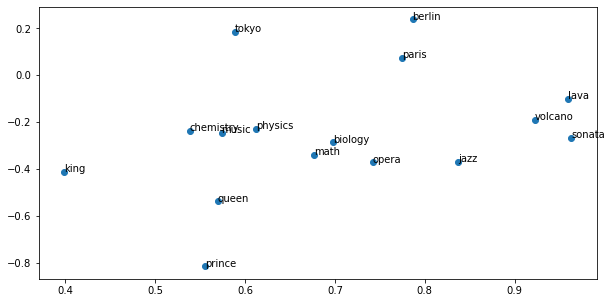

In [82]:
# -----------------------------------------------------------------
# Run this code to Reduce 300-Dimensinal Word Embeddings to k Dimensions
# Note: This may take several minutes
# -----------------------------------------------------------------
words = ['math','music', 'jazz', 'opera', 'paris', 'berlin', 'tokyo', 'queen', 'king', 'prince', 'volcano', 'chemistry', 'biology', 'physics', 'lava', 'sonata']
M, word2Ind = get_matrix_of_vectors(wv_from_bin, required_words = words)
M_reduced = reduce_to_k_dim(M, k = 2)

plot_embeddings(M_reduced, word2Ind, words)

#### <font color="red">Write your answer here.</font>
<ol>
<li>Cities like Paris and Berlin have clustered together but Tokyo has not clustered with them. This might be because of the fact that Paris and Berlin are European cities whereas, Tokyo is in Asia</li>
<li>it is peculiar that Sonata has clustered with lava and volcano and difficult to finda reasoning to. As Professor had mentioned in the class, it might be because after performing dimentionality reduction, some information is lost and the visual representation that we get doesn't always do justice to the embeddings that are in higher dimensions. Though it seems to have a large cosine similarity with Jazz and opera</li>
<li>Biology and Math are not as close to chemistry and physics as expected which are clustered together with music</li>
</ol>

### Cosine Similarity
Now that we have word vectors, we need a way to quantify the similarity between individual words, according to these vectors. One such metric is cosine-similarity. We will be using this to find words that are "close" and "far" from one another.

We can think of n-dimensional vectors as points in n-dimensional space. If we take this perspective L1 and L2 Distances help quantify the amount of space "we must travel" to get between these two points. Another approach is to examine the angle between two vectors. From trigonometry we know that:

<img src="imgs/inner_product.png" width=20% style="float: center;"></img>

Instead of computing the actual angle, we can leave the similarity in terms of $similarity = cos(\Theta)$. Formally the [Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity) $s$ between two vectors $p$ and $q$ is defined as:

$$s = \frac{p \cdot q}{||p|| ||q||}, \textrm{ where } s \in [-1, 1] $$ 

### Question 2.3: Polysemous Words (2 points) [code + written] 
Find a [polysemous](https://en.wikipedia.org/wiki/Polysemy) word (for example, "leaves" or "scoop") such that the top-10 most similar words (according to cosine similarity) contains related words from *both* meanings. For example, "leaves" has both "vanishes" and "stalks" in the top 10, and "scoop" has both "handed_waffle_cone" and "lowdown". You will probably need to try several polysemous words before you find one. Please state the polysemous word you discover and the multiple meanings that occur in the top 10. Why do you think many of the polysemous words you tried didn't work?

**Note**: You should use the `wv_from_bin.most_similar(word)` function to get the top 10 similar words. This function ranks all other words in the vocabulary with respect to their cosine similarity to the given word. For further assistance please check the __[GenSim documentation](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.FastTextKeyedVectors.most_similar)__.

In [62]:
# ------------------
# Write your polysemous word exploration code here.

wv_from_bin.most_similar('free')

# ------------------

[('Free', 0.6718050241470337),
 ('Six_Flags_website_http://www.sixflags.com', 0.5262575149536133),
 ('FREE', 0.5083318948745728),
 ('nominal_fee', 0.45694470405578613),
 ('therapy_systems_NFITS', 0.4531920850276947),
 ('restricted', 0.4485984444618225),
 ('complimentary', 0.44757080078125),
 ('afree', 0.4412050247192383),
 ('www.dickmorris.com', 0.4327717423439026),
 ('###-####_artmuseumgr.org', 0.4296324551105499)]

#### <font color="red">Write your answer here.</font> <br>
<ol>
<li>Meaning 1: Freedom(in the context of ): restricted(antonym), afree</li>
<li>Meaning 2: Free of charge: nominal_fee, complimentary</li>
<li>Misc: Six_Flags_website_http://www.sixflags.com, etc.</li>
</ol>

### Question 2.4: Synonyms & Antonyms

When considering Cosine Similarity, it's often more convenient to think of Cosine Distance, which is simply 1 - Cosine Similarity.

Find three words (w1,w2,w3) where w1 and w2 are synonyms and w1 and w3 are antonyms, but Cosine Distance(w1,w3) < Cosine Distance(w1,w2). For example, w1="happy" is closer to w3="sad" than to w2="cheerful". 

Once you have found your example, please give a possible explanation for why this counter-intuitive result may have happened.

You should use the the `wv_from_bin.distance(w1, w2)` function here in order to compute the cosine distance between two words. Please see the __[GenSim documentation](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.FastTextKeyedVectors.distance)__ for further assistance.

In [64]:
# ------------------
# Write your synonym & antonym exploration code here.

w1 = "light"
w2 = "lightweight"
w3 = "heavy"
w1_w2_dist = wv_from_bin.distance(w1, w2)
w1_w3_dist = wv_from_bin.distance(w1, w3)

print("Synonyms {}, {} have cosine distance: {}".format(w1, w2, w1_w2_dist))
print("Antonyms {}, {} have cosine distance: {}".format(w1, w3, w1_w3_dist))

# ------------------

Synonyms light, lightweight have cosine distance: 0.8339695185422897
Antonyms light, heavy have cosine distance: 0.689866691827774


#### <font color="red">Write your answer here.</font><br>
An antonym of a word may sometimes have a smaller cosine similarity score compared to other synonyms as a word can be used in different contexts and have different meanings.

### Solving Analogies with Word Vectors
Word2Vec vectors have been shown to *sometimes* exhibit the ability to solve analogies. 

As an example, for the analogy "man : king :: woman : x", what is x?

In the cell below, we show you how to use word vectors to find x. The `most_similar` function finds words that are most similar to the words in the `positive` list and most dissimilar from the words in the `negative` list. The answer to the analogy will be the word ranked most similar (largest numerical value).

**Note:** Further Documentation on the `most_similar` function can be found within the __[GenSim documentation](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.FastTextKeyedVectors.most_similar)__.

In [63]:
# Run this cell to answer the analogy -- man : king :: woman : x
pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'king'], negative=['man']))

[('queen', 0.7118192315101624),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431607246399),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235946178436279),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]


### Question 2.5: Finding Analogies
Find an example of analogy that holds according to these vectors (i.e. the intended word is ranked top). In your solution please state the full analogy in the form x:y :: a:b. If you believe the analogy is complicated, explain why the analogy holds in one or two sentences.

**Note**: You may have to try many analogies to find one that works!

In [78]:
# ------------------
# Write your analogy exploration code here.

pprint.pprint(wv_from_bin.most_similar(positive=['feline','dog'], negative=['cat']))

# ------------------

[('canine', 0.7184652090072632),
 ('canines', 0.7025594711303711),
 ('dogs', 0.6873705387115479),
 ('pooch', 0.6770342588424683),
 ('pooches', 0.6361940503120422),
 ('canine_companion', 0.6199101209640503),
 ('Rottweiler', 0.6135388612747192),
 ('golden_retriever', 0.6127071976661682),
 ('puppy', 0.6104601621627808),
 ('beagle', 0.608494758605957)]


#### <font color="red">Write your answer here.</font> <br>
cat : feline :: dog : canine

### Question 2.6: Guided Analysis of Bias in Word Vectors

It's important to be cognizant of the biases (gender, race, sexual orientation etc.) implicit to our word embeddings.

Run the cell below, to examine (a) which terms are most similar to "woman" and "boss" and most dissimilar to "man", and (b) which terms are most similar to "man" and "boss" and most dissimilar to "woman". What do you find in the top 10?

In [67]:
# Run this cell
# Here `positive` indicates the list of words to be similar to and `negative` indicates the list of words to be
# most dissimilar from.
pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'boss'], negative=['man']))
print()
pprint.pprint(wv_from_bin.most_similar(positive=['man', 'boss'], negative=['woman']))

[('bosses', 0.5522644519805908),
 ('manageress', 0.49151355028152466),
 ('exec', 0.45940813422203064),
 ('Manageress', 0.45598435401916504),
 ('receptionist', 0.4474116861820221),
 ('Jane_Danson', 0.44480547308921814),
 ('Fiz_Jennie_McAlpine', 0.4427577257156372),
 ('Coronation_Street_actress', 0.44275563955307007),
 ('supremo', 0.4409853219985962),
 ('coworker', 0.43986251950263977)]

[('supremo', 0.6097397804260254),
 ('MOTHERWELL_boss', 0.5489561557769775),
 ('CARETAKER_boss', 0.5375303626060486),
 ('Bully_Wee_boss', 0.5333974361419678),
 ('YEOVIL_Town_boss', 0.5321705341339111),
 ('head_honcho', 0.5281979441642761),
 ('manager_Stan_Ternent', 0.525971531867981),
 ('Viv_Busby', 0.5256163477897644),
 ('striker_Gabby_Agbonlahor', 0.5250812768936157),
 ('BARNSLEY_boss', 0.5238943099975586)]


#### <font color="red">Write your answer here.</font> <br>
When gender neutral words like 'boss' are used we get a better result for the word 'man' than for the word 'woman'. <br>
We get words like 'bosses', 'manageress' etc. when we use the association between 'man' and 'boss' and also interestingly enough words like 'receptionist'<br>
Whereas, when we use the association between 'woman' and 'boss' we get very poor results like 'supremo', 'MOTHERWELL_boss', 'CARETAKER_boss', etc. of which I couldn't make any sense.

### Question 2.7: Independent Analysis of Bias in Word Vectors

Use the `most_similar` function to find another case where some bias is exhibited by the vectors. Please briefly explain the example of bias that you discover.

In [86]:
# ------------------
# Write your bias exploration code here.

pprint.pprint(wv_from_bin.most_similar(positive=['woman','doctor'], negative=['man']))
print()
pprint.pprint(wv_from_bin.most_similar(positive=['man','doctor'], negative=['woman']))

# ------------------

[('gynecologist', 0.7093892097473145),
 ('nurse', 0.6477287411689758),
 ('doctors', 0.6471461057662964),
 ('physician', 0.6438997387886047),
 ('pediatrician', 0.6249488592147827),
 ('nurse_practitioner', 0.6218312978744507),
 ('obstetrician', 0.6072014570236206),
 ('ob_gyn', 0.5986711978912354),
 ('midwife', 0.5927063226699829),
 ('dermatologist', 0.5739567279815674)]

[('physician', 0.6463665962219238),
 ('doctors', 0.5858404040336609),
 ('surgeon', 0.5723941326141357),
 ('dentist', 0.5523648262023926),
 ('cardiologist', 0.5413816571235657),
 ('neurologist', 0.5271127223968506),
 ('neurosurgeon', 0.5249835252761841),
 ('urologist', 0.5247740149497986),
 ('Doctor', 0.52406245470047),
 ('internist', 0.5183224678039551)]


#### <font color="red">Write your answer here.</font> <br>
What we can see here is a gender-bias. The profession of a doctor is essentially gender neutral but we can see the bias in the sub types of that profession where we can see that most women are gynacologists, pediatrician and we even get an altogether different occupation of a 'nurse'. Where as when it comes to the association between 'man' and 'doctor' we get 'physician', 'surgeon', etc.

### Question 2.8: Thinking About Bias

What might be the cause of these biases in the word vectors?

#### <font color="red">Write your answer here.</font><br>
The bias that we see here is mostly because of the biased data. The wikipedia articles that we have used have been written by a lot of people and we alreday know that there is a general bias that exists within each individual huamn being. Since we train these word embeddings on this biased data, this bias is implicitly captured by the model because it exists in the data.

## Implementation: Bonus points

Anything extra goes here. For example:

1. How does changing the window size (smaller, larger) change the word to word similarities?
2. Even though `count_unigram_context` computes count-based vector representations only for the top K (10000) most common words in the vocabulary, it uses all the words that appear in the context. Change it to only use word in the context that are in the top K most common words, and see if it improves the results.

In [93]:
window = 6

In [94]:
word_representations = create_vocab(wiki_data)
count_unigram_context(wiki_data, word_representations)
normalize(word_representations)

In [95]:
find_nearest_neighbors(word_representations, "musician", 10)

0	musician	1.00000
1	writer	0.92742
2	pianist	0.90955
3	artist	0.90331
4	photographer	0.90279
5	entrepreneur	0.89950
6	businessman	0.89924
7	actor	0.89900
8	journalist	0.89359
9	producer	0.89292


When we use more number of context words we get higher similarities and results that seem to be slightly more accurate. Yet still not better than $tf.idf$ word_representation.